In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('loan_data.csv')

In [3]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [4]:
df['not.fully.paid'].value_counts(normalize = True)

0    0.839946
1    0.160054
Name: not.fully.paid, dtype: float64

# Modelling with Imbalance

In [5]:
y = df['not.fully.paid']
x = df.drop('not.fully.paid', axis = 1)

In [6]:
x['purpose'] = x['purpose'].astype('category')

In [7]:
x['purpose'].cat.categories = list(range(0,7))

In [8]:
x.purpose

0       2
1       1
2       2
3       2
4       1
5       1
6       2
7       0
8       4
9       2
10      2
11      2
12      2
13      6
14      2
15      5
16      0
17      1
18      2
19      5
20      0
21      0
22      1
23      1
24      2
25      0
26      0
27      2
28      0
29      0
       ..
9548    4
9549    4
9550    0
9551    4
9552    2
9553    2
9554    6
9555    4
9556    2
9557    1
9558    2
9559    1
9560    0
9561    0
9562    2
9563    2
9564    0
9565    0
9566    0
9567    0
9568    0
9569    4
9570    0
9571    0
9572    2
9573    0
9574    0
9575    2
9576    4
9577    2
Name: purpose, Length: 9578, dtype: category
Categories (7, int64): [0, 1, 2, 3, 4, 5, 6]

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.metrics import classification_report

In [10]:
def awawa (X,Y,model):
    X_train,X_test,y_train,y_test = train_test_split(X,Y)
    clf = model()
    clf.fit(X_train,y_train)
    
    prediction_test = clf.predict(X_test)
    prediction_train = clf.predict(X_train)
    print('Class Report Test Data')
    print(classification_report(y_test, prediction_test))
    print('===========================================================')
    print('Class Report Train Data')
    print(classification_report(y_train, prediction_train))
    print('===========================================================')

In [11]:
awawa(x,y,LogisticRegression)

Class Report Test Data
              precision    recall  f1-score   support

           0       0.86      1.00      0.92      2046
           1       0.55      0.02      0.03       349

    accuracy                           0.85      2395
   macro avg       0.70      0.51      0.48      2395
weighted avg       0.81      0.85      0.79      2395

Class Report Train Data
              precision    recall  f1-score   support

           0       0.84      1.00      0.91      5999
           1       0.43      0.02      0.03      1184

    accuracy                           0.83      7183
   macro avg       0.63      0.51      0.47      7183
weighted avg       0.77      0.83      0.77      7183



/Users/mac/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [12]:
awawa(x,y,DecisionTreeClassifier)

Class Report Test Data
              precision    recall  f1-score   support

           0       0.85      0.83      0.84      2022
           1       0.21      0.23      0.22       373

    accuracy                           0.74      2395
   macro avg       0.53      0.53      0.53      2395
weighted avg       0.75      0.74      0.75      2395

Class Report Train Data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6023
           1       1.00      1.00      1.00      1160

    accuracy                           1.00      7183
   macro avg       1.00      1.00      1.00      7183
weighted avg       1.00      1.00      1.00      7183



In [13]:
awawa(x,y,RandomForestClassifier)

Class Report Test Data
              precision    recall  f1-score   support

           0       0.83      0.98      0.90      1991
           1       0.30      0.04      0.07       404

    accuracy                           0.82      2395
   macro avg       0.57      0.51      0.49      2395
weighted avg       0.74      0.82      0.76      2395

Class Report Train Data
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      6054
           1       1.00      0.87      0.93      1129

    accuracy                           0.98      7183
   macro avg       0.99      0.93      0.96      7183
weighted avg       0.98      0.98      0.98      7183



/Users/mac/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [14]:
awawa(x,y,GradientBoostingClassifier)

Class Report Test Data
              precision    recall  f1-score   support

           0       0.84      0.99      0.91      2009
           1       0.38      0.04      0.07       386

    accuracy                           0.84      2395
   macro avg       0.61      0.51      0.49      2395
weighted avg       0.77      0.84      0.77      2395

Class Report Train Data
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      6036
           1       0.92      0.10      0.18      1147

    accuracy                           0.86      7183
   macro avg       0.89      0.55      0.55      7183
weighted avg       0.86      0.86      0.80      7183



# Handling Imbalance Data

# Undersampling

In [15]:
a = list(range(1,100))

In [16]:
minority_data = df[df['not.fully.paid'] == 1]
majority_data = df[df['not.fully.paid'] == 0]

In [17]:
index_for_mayority = np.random.choice(majority_data.index, len(minority_data))

In [18]:
df_class0 = df.loc[index_for_mayority]

In [19]:
undersampling_df = pd.concat([df_class0, minority_data])

In [20]:
undersampling_df['not.fully.paid'].value_counts(normalize = True)

1    0.5
0    0.5
Name: not.fully.paid, dtype: float64

In [21]:
undersampling_df = pd.get_dummies(undersampling_df,columns=['purpose'],drop_first = True)

In [22]:
len(undersampling_df)

3066

In [23]:
under_y = undersampling_df['not.fully.paid']
under_x = undersampling_df.drop('not.fully.paid', axis = 1)

In [24]:
awawa(under_x,under_y,DecisionTreeClassifier)

Class Report Test Data
              precision    recall  f1-score   support

           0       0.60      0.64      0.62       398
           1       0.58      0.54      0.56       369

    accuracy                           0.59       767
   macro avg       0.59      0.59      0.59       767
weighted avg       0.59      0.59      0.59       767

Class Report Train Data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1135
           1       1.00      1.00      1.00      1164

    accuracy                           1.00      2299
   macro avg       1.00      1.00      1.00      2299
weighted avg       1.00      1.00      1.00      2299



# Oversampling

# 1. Random Over Sampling ( ROS )

In [25]:
from imblearn.over_sampling import RandomOverSampler, SMOTE

In [26]:
ros = RandomOverSampler()

In [27]:
X_ros, y_ros = ros.fit_sample(x,y)

In [28]:
df_over_all = pd.DataFrame(X_ros,columns = x.columns)

In [29]:
df_over_all['not.fully.paid'] = y_ros

In [30]:
df_over_all['not.fully.paid'].value_counts(normalize = True)

1    0.5
0    0.5
Name: not.fully.paid, dtype: float64

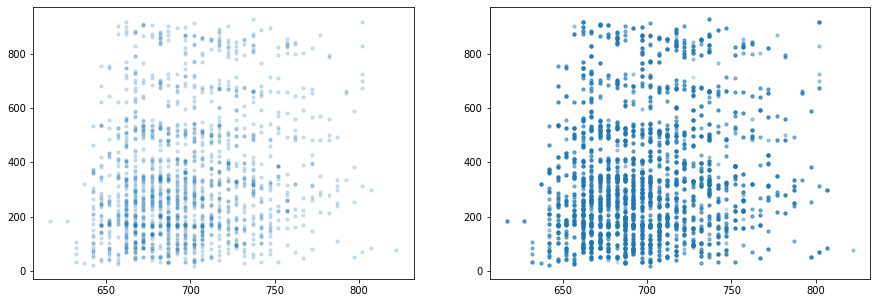

In [31]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))
ax[0].scatter(df[df['not.fully.paid'] ==1]['fico'], 
              df[df['not.fully.paid'] ==1]['installment'], s= 10, alpha = 0.2)
ax[1].scatter(df_over_all[df_over_all['not.fully.paid'] ==1]['fico'], 
              df_over_all[df_over_all['not.fully.paid'] ==1]['installment'], s= 10, alpha = 0.2)

In [32]:
awawa(df_over_all.drop('not.fully.paid', axis = 1), df_over_all['not.fully.paid'], DecisionTreeClassifier)

Class Report Test Data
              precision    recall  f1-score   support

           0       0.98      0.81      0.89      2048
           1       0.83      0.98      0.90      1975

    accuracy                           0.89      4023
   macro avg       0.91      0.90      0.89      4023
weighted avg       0.91      0.89      0.89      4023

Class Report Train Data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5997
           1       1.00      1.00      1.00      6070

    accuracy                           1.00     12067
   macro avg       1.00      1.00      1.00     12067
weighted avg       1.00      1.00      1.00     12067



In [33]:
def awawaa (X,Y,model):
    
    X_train,X_test,y_train,y_test = train_test_split(X,Y)
    ros = RandomOverSampler(random_state = 101)
    X_ros, y_ros = ros.fit_sample(X_train,y_train)
   
    clf = model()
    clf.fit(X_ros,y_ros)
    
    prediction_test = clf.predict(X_test)
    prediction_train = clf.predict(X_ros)
    print('Class Report Test Data')
    print(classification_report(y_test, prediction_test))
    print('===========================================================')
    print('Class Report Train Data')
    print(classification_report(y_ros, prediction_train))
    print('===========================================================')

In [34]:
awawaa(x,y,GradientBoostingClassifier)

Class Report Test Data
              precision    recall  f1-score   support

           0       0.89      0.71      0.79      2013
           1       0.26      0.53      0.35       382

    accuracy                           0.68      2395
   macro avg       0.57      0.62      0.57      2395
weighted avg       0.79      0.68      0.72      2395

Class Report Train Data
              precision    recall  f1-score   support

           0       0.72      0.71      0.72      6032
           1       0.72      0.73      0.72      6032

    accuracy                           0.72     12064
   macro avg       0.72      0.72      0.72     12064
weighted avg       0.72      0.72      0.72     12064



# SMOTE ( Syntetic Minority Over Training )

In [35]:
sm = SMOTE(random_state = 101)

In [36]:
X_sm, y_sm = sm.fit_sample(x,y)

In [37]:
df_smote_all = pd.DataFrame(X_sm, columns = x.columns)

In [38]:
df_smote_all['not.fully.paid'] = y_sm

In [39]:
df_smote_all['not.fully.paid'].value_counts(normalize = True)

1    0.5
0    0.5
Name: not.fully.paid, dtype: float64

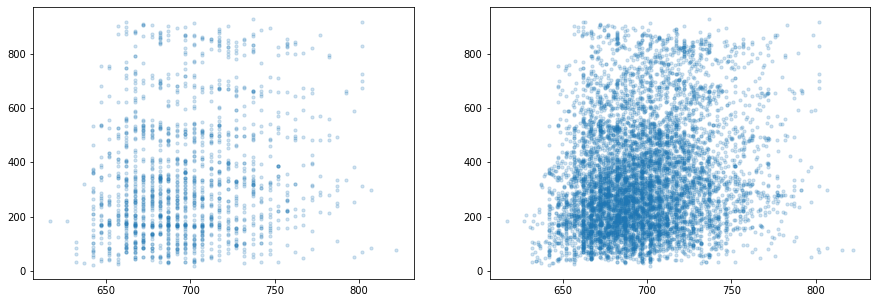

In [40]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))
ax[0].scatter(df[df['not.fully.paid'] ==1]['fico'], 
              df[df['not.fully.paid'] ==1]['installment'], s= 10, alpha = 0.2)
ax[1].scatter(df_smote_all[df_smote_all['not.fully.paid'] ==1]['fico'], 
              df_smote_all[df_smote_all['not.fully.paid'] ==1]['installment'], s= 10, alpha = 0.2)

In [41]:
awawa(df_smote_all.drop('not.fully.paid', axis = 1), df_smote_all['not.fully.paid'], DecisionTreeClassifier)

Class Report Test Data
              precision    recall  f1-score   support

           0       0.82      0.82      0.82      1990
           1       0.82      0.82      0.82      2033

    accuracy                           0.82      4023
   macro avg       0.82      0.82      0.82      4023
weighted avg       0.82      0.82      0.82      4023

Class Report Train Data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6055
           1       1.00      1.00      1.00      6012

    accuracy                           1.00     12067
   macro avg       1.00      1.00      1.00     12067
weighted avg       1.00      1.00      1.00     12067



In [42]:
def awawaw (X,Y,model):
    
    X_train,X_test,y_train,y_test = train_test_split(X,Y)
    ros = SMOTE(random_state = 101)
    X_ros, y_ros = ros.fit_sample(X_train,y_train)
   
    clf = model()
    clf.fit(X_ros,y_ros)
    
    prediction_test = clf.predict(X_test)
    prediction_train = clf.predict(X_ros)
    print('Class Report Test Data')
    print(classification_report(y_test, prediction_test))
    print('===========================================================')
    print('Class Report Train Data')
    print(classification_report(y_ros, prediction_train))
    print('===========================================================')

In [43]:
awawaw(x,y, DecisionTreeClassifier)

Class Report Test Data
              precision    recall  f1-score   support

           0       0.86      0.83      0.84      2010
           1       0.24      0.27      0.25       385

    accuracy                           0.74      2395
   macro avg       0.55      0.55      0.55      2395
weighted avg       0.76      0.74      0.75      2395

Class Report Train Data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6035
           1       1.00      1.00      1.00      6035

    accuracy                           1.00     12070
   macro avg       1.00      1.00      1.00     12070
weighted avg       1.00      1.00      1.00     12070



# Class Weight

In [44]:
X_train,X_test,y_train,y_test = train_test_split(x,y, random_state = 101)

In [60]:
df['not.fully.paid'].value_counts(normalize= True)

0    0.839946
1    0.160054
Name: not.fully.paid, dtype: float64

In [45]:
weight = {0 : 1, 1 : 8}

In [46]:
model_weight = DecisionTreeClassifier(random_state = 101, class_weight = weight, min_samples_leaf = 50)

In [47]:
model_weight.fit(X_train,y_train)

DecisionTreeClassifier(class_weight={0: 1, 1: 8}, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=101, splitter='best')

In [48]:
pred_weight = model_weight.predict(X_test)

In [49]:
print(classification_report(y_test,pred_weight))

              precision    recall  f1-score   support

           0       0.88      0.44      0.59      2029
           1       0.18      0.68      0.28       366

    accuracy                           0.48      2395
   macro avg       0.53      0.56      0.44      2395
weighted avg       0.78      0.48      0.54      2395



In [50]:
y.value_counts(normalize = True)

0    0.839946
1    0.160054
Name: not.fully.paid, dtype: float64

# Ensemble Method

# Random Forest Classifier

In [51]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot

/Users/mac/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [52]:
from sklearn.ensemble import RandomForestClassifier

In [53]:
rfc = RandomForestClassifier( min_samples_leaf = 50, class_weight = {0:1,1:7},n_estimators = 100)

In [54]:
rfc.fit(X_train,y_train)
pred_tree = rfc.predict(X_test)

In [55]:
print(classification_report(y_test,pred_tree))

              precision    recall  f1-score   support

           0       0.90      0.51      0.65      2029
           1       0.20      0.69      0.31       366

    accuracy                           0.54      2395
   macro avg       0.55      0.60      0.48      2395
weighted avg       0.79      0.54      0.60      2395



In [56]:
len(rfc.estimators_)

100

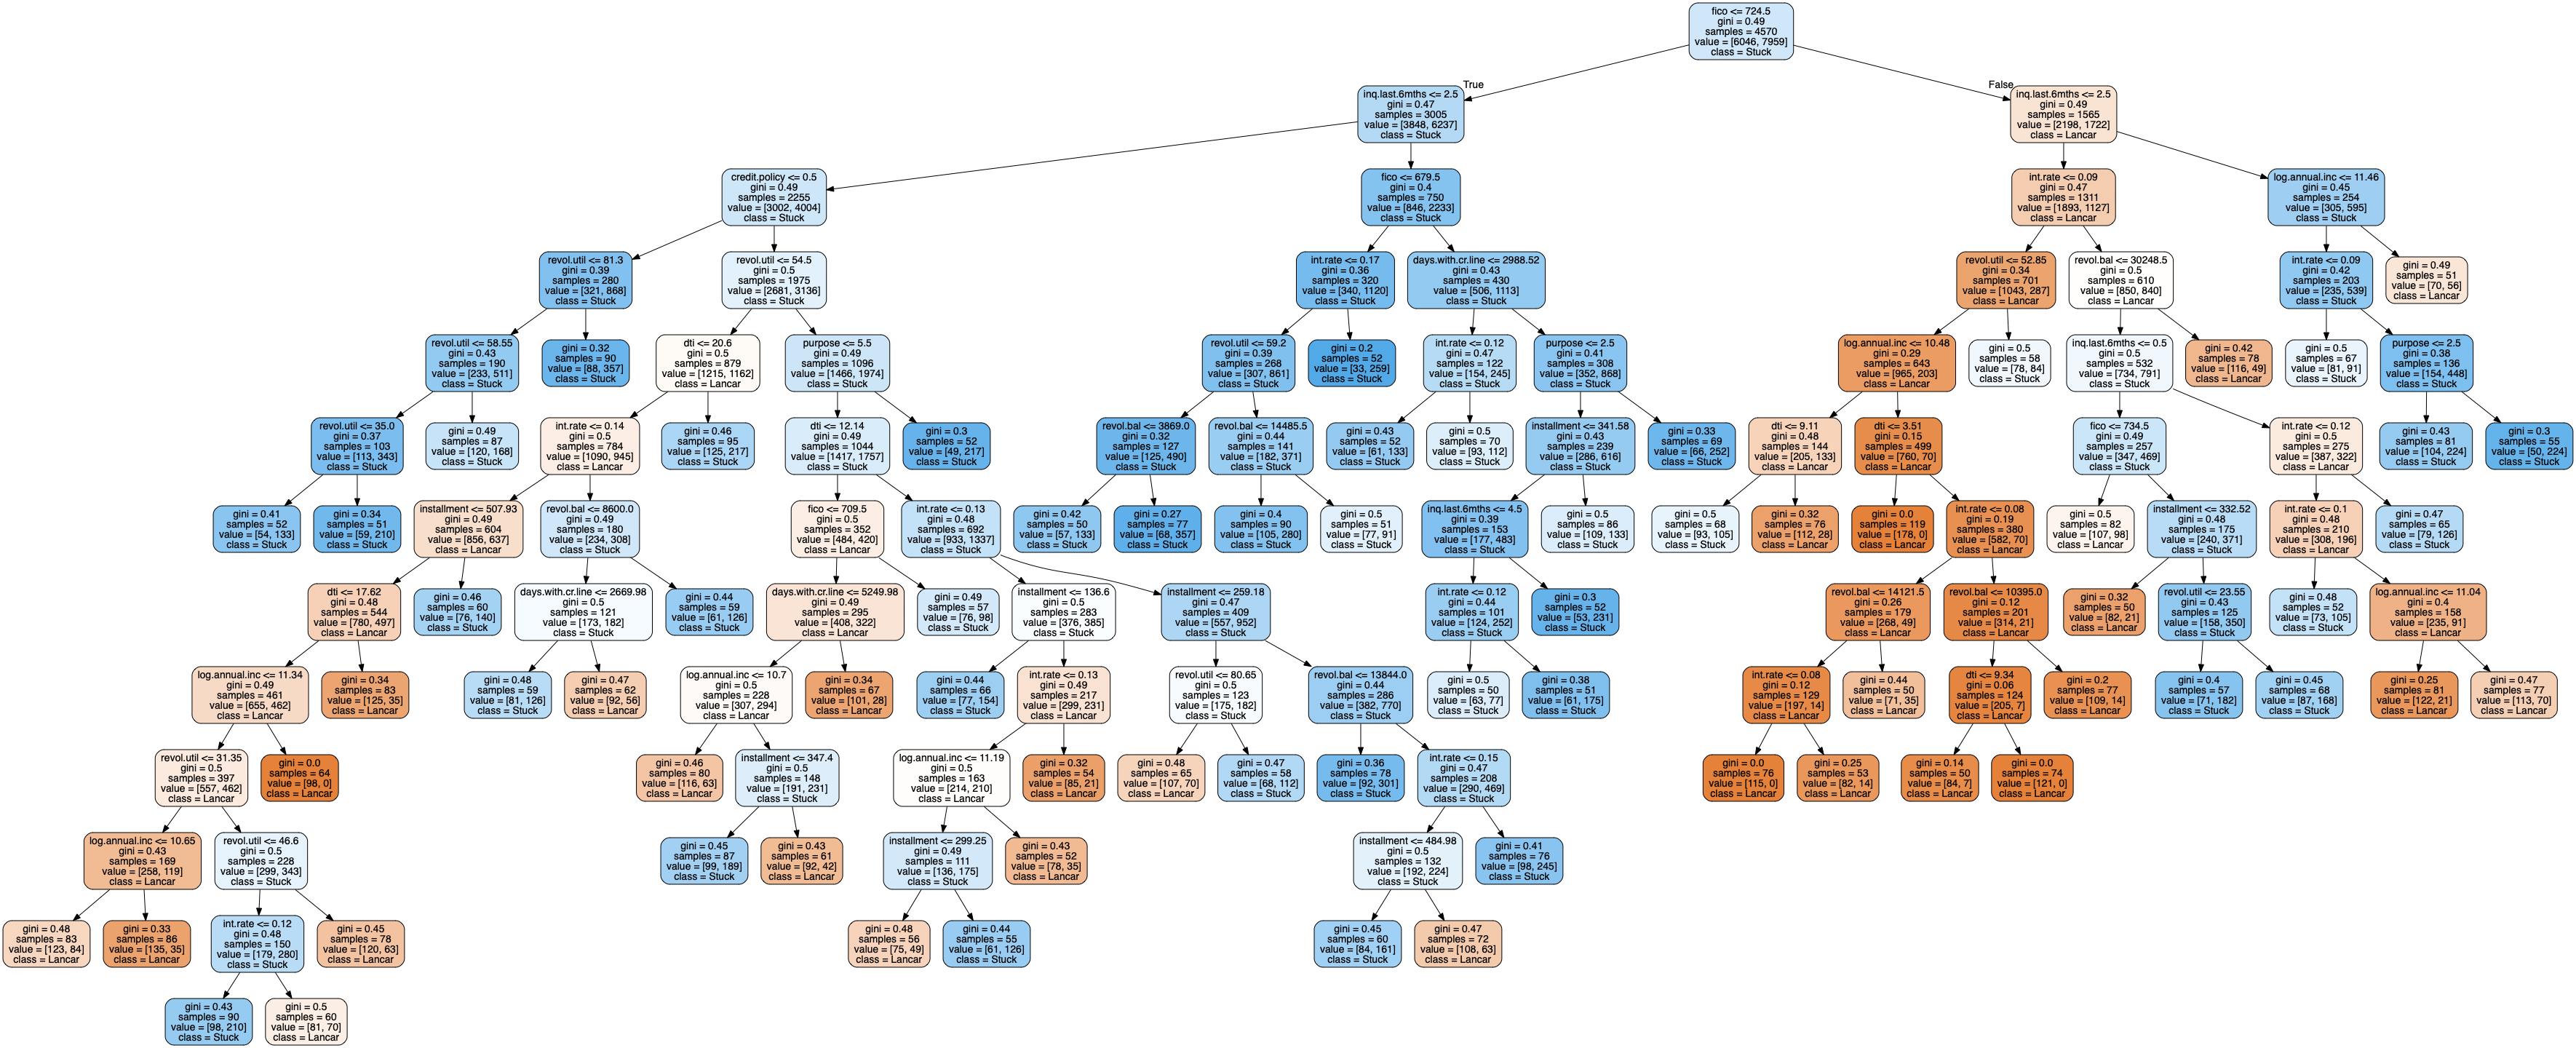

In [57]:
coba = StringIO()  
export_graphviz(rfc.estimators_[0], out_file=coba,feature_names=X_train.columns,filled=True,rounded=True, 
                class_names = ['Lancar', 'Stuck'], precision = 2, proportion = False)

graph = pydot.graph_from_dot_data(coba.getvalue())  
Image(graph[0].create_png()) 